# EDA for Multidimensional Poverty Index in developing countries and How it affects the freeness of a country






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
df = pd.read_excel("Multidimensional Poverty Index____.xls", header = 2, nrows = 102)
labels = pd.read_excel("Aggregate_Category_and_Subcategory_Scores_FIW_2003-2022.xlsx", sheet_name = 1)

### Data Cleaning for Multidimensional Poverty Index

1. Rename useful column names which are unnamed to that present in the dataset
2. There exists an empty column 'b' filled with NAs so, delete that
3. Drop the first row as it has column names
4. Reset the index of the dataframe
5. Clean missing values

In [28]:


df = df.rename(columns = {'Unnamed: 0':'Country', 'Unnamed: 18': 'Population vulnerable to multidimensional poverty'})

df = df.drop(df.filter(regex='Unnamed:').columns, axis=1)
df = df.drop('b', axis = 1)

df = df.drop(0)
df = df.reset_index(drop = True)

# replace missing values not represented by NaN with it
df = df.replace('..', np.NaN)

df = df.dropna()

df


2       0.278065
3      32.457551
5      16.721532
8      40.937144
9      14.676309
         ...    
96     10.158028
97      0.725191
98     23.885250
99     24.182746
100     8.027032
Name: Population in severe multidimensional poverty , Length: 80, dtype: float64

### Data Cleaning for Aggregate Category and Subcategory Scores

1. Drop unnamed columns which don't have any data
2. There is an empty coulmn 'x' which marks the last coulmn of the dataset, delete that
3. Get only the data from 2018 as the Multidimensional Poverty Index has data for that year
4. Reset the indices for readability

In [14]:

labels = labels.drop(labels.filter(regex='Unnamed:').columns, axis=1)
labels = labels.rename(columns = {'Country/Territory': 'Country'})
labels = labels.drop('x', axis = 1)
labels = labels[labels['Edition'] == 2018]
labels = labels.reset_index(drop = True)
labels


,Country,Region,C/T?,Edition,Status,PR Rating,CL Rating,A,B,C,Add Q,Add A,PR,D,E,F,G,CL,Total
0,Abkhazia,Eurasia,t,2018,PF,4,5,6,8,4,0,NaN,18,8,6,4,5,23,41
1,Afghanistan,Asia,c,2018,NF,5,6,2,7,3,0,NaN,12,6,4,2,2,14,26
2,Albania,Europe,c,2018,PF,3,3,8,13,7,0,NaN,28,13,9,9,9,40,68
3,Algeria,Africa,c,2018,NF,6,5,3,4,3,0,NaN,10,7,5,6,7,25,35
4,Andorra,Europe,c,2018,F,1,1,12,15,12,0,NaN,39,15,11,15,16,57,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,West Bank,Middle East,t,2018,NF,7,5,2,4,2,3,NaN,5,8,5,5,5,23,28
205,Western Sahara,Africa,t,2018,NF,7,7,0,0,0,3,NaN,-3,3,0,0,4,7,4
206,Yemen,Middle East,c,2018,NF,7,6,0,1,0,0,NaN,1,5,3,2,2,12,13
207,Zambia,Africa,c,2018,PF,4,4,6,10,6,0,NaN,22,10,7,8,8,33,55


### Transformation

In [15]:
# newdf = labels[['Country', 'Status']]
merged = pd.merge(df, labels[['Country', 'Status']], on =['Country'], how = 'left')
# print(merged.info())
merged['Population vulnerable to multidimensional poverty']
# merged

0      18.137625
1       5.040320
2       5.836775
3      15.542856
4       2.717535
         ...    
96     32.295159
97      5.619922
98     22.074686
99     22.481249
100    27.388456
Name: Population vulnerable to multidimensional poverty, Length: 101, dtype: float64

## Relationship of Freedom with Population Vulnerable to Poverty

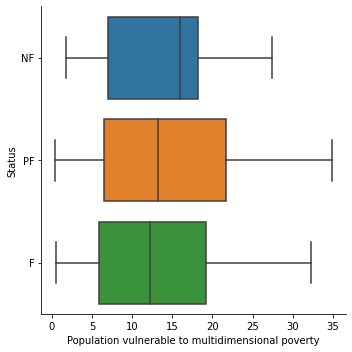

In [6]:

# intensity of deprivation with PF, F, NF
# standard of living with population vulernable -> among diff statuses
sns.catplot(y = 'Status', x = 'Population vulnerable to multidimensional poverty', data = merged, kind = "box", orient= "h")

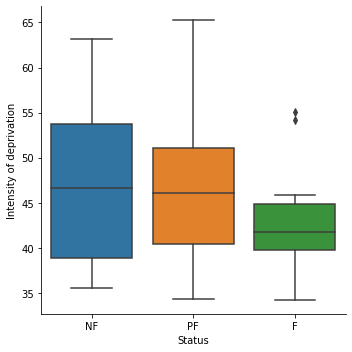

In [7]:
sns.catplot(x = 'Status', y = 'Intensity of deprivation', data = merged, kind = "box")

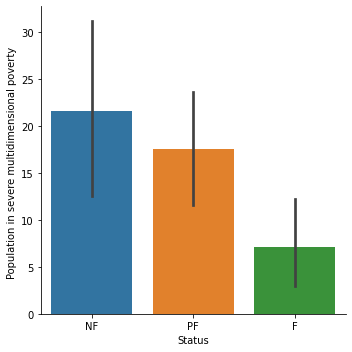

In [38]:
# sns.catplot(x = 'National poverty line', y = 'Inequality among the poor', data = merged, hue = 'Status' , kind = "swarm")
# sns.displot(merged, x='Standard of living', hue="Status", kind="kde", fill = True)

# sns.histplot(merged['Population in severe multidimensional poverty '])

sns.catplot(x = 'Status', y = 'Population in severe multidimensional poverty ', data = merged, kind = 'bar')

# sns.catplot(y = 'Status', x = 'Population in severe multidimensional poverty ', data = merged, kind = "box", orient= "h")

# sns.relplot()
